In [1]:
import pywt
import numpy as np
import scaleogram as scg
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import pandas as pd

Data for this notebook is taken from: [
Human Activity Recognition Using Smartphones Data Set at UCI](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

In [3]:
""" Read train data """
with open('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', 'r') as f:
    body_acc_x_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', 'r') as f:
    body_acc_y_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', 'r') as f:
    body_acc_z_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', 'r') as f:
    body_gyro_x_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', 'r') as f:
    body_gyro_y_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', 'r') as f:
    body_gyro_z_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', 'r') as f:
    total_acc_x_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', 'r') as f:
    total_acc_y_train_raw = f.readlines()
    
with open('UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', 'r') as f:
    total_acc_z_train_raw = f.readlines()

In [4]:
""" Read test data """
with open('UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt', 'r') as f:
    body_acc_x_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt', 'r') as f:
    body_acc_y_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt', 'r') as f:
    body_acc_z_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt', 'r') as f:
    body_gyro_x_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt', 'r') as f:
    body_gyro_y_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt', 'r') as f:
    body_gyro_z_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', 'r') as f:
    total_acc_x_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt', 'r') as f:
    total_acc_y_test_raw = f.readlines()
    
with open('UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt', 'r') as f:
    total_acc_z_test_raw = f.readlines()

In [7]:
def process_input(input_data):
    raw_data = list()
    for i in range(len(input_data)):
        record = input_data[i].split(' ')
        record_filtered = list(filter(lambda a: a != '', record))
        raw_data.append(np.array(record_filtered,dtype=float))
    return np.array(raw_data)

In [14]:
body_acc_x_train = process_input(body_acc_x_train_raw)
body_acc_y_train = process_input(body_acc_y_train_raw)
body_acc_z_train = process_input(body_acc_z_train_raw)
body_gyro_x_train = process_input(body_gyro_x_train_raw)
body_gyro_y_train = process_input(body_gyro_y_train_raw)
body_gyro_z_train = process_input(body_gyro_z_train_raw)
total_acc_x_train = process_input(total_acc_x_train_raw)
total_acc_y_train = process_input(total_acc_y_train_raw)
total_acc_z_train = process_input(total_acc_z_train_raw)

body_acc_x_test = process_input(body_acc_x_test_raw)
body_acc_y_test = process_input(body_acc_y_test_raw)
body_acc_z_test = process_input(body_acc_z_test_raw)
body_gyro_x_test = process_input(body_gyro_x_test_raw)
body_gyro_y_test = process_input(body_gyro_y_test_raw)
body_gyro_z_test = process_input(body_gyro_z_test_raw)
total_acc_x_test = process_input(total_acc_x_test_raw)
total_acc_y_test = process_input(total_acc_y_test_raw)
total_acc_z_test = process_input(total_acc_z_test_raw)

In [30]:
train_data = np.array([body_acc_x_train, body_acc_y_train, body_acc_z_train, 
              body_gyro_x_train, body_gyro_y_train, body_gyro_z_train, 
              total_acc_x_train, total_acc_y_train, total_acc_z_train])
test_data = np.array([body_acc_x_test, body_acc_y_test, body_acc_z_test, 
             body_gyro_x_test, body_gyro_y_test, body_gyro_z_test, 
             total_acc_x_test, total_acc_y_test, total_acc_z_test])

In [39]:
print(type(train_data))
print(type(test_data))
print(train_data.shape)
print(test_data.shape)

train_data[0][0]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(9, 7352, 128)
(9, 2947, 128)


array([ 1.808515e-04,  1.013856e-02,  9.275574e-03,  5.065897e-03,
        1.081025e-02,  4.045101e-03,  4.757375e-03,  6.213647e-03,
        3.306744e-03,  7.571941e-03,  5.407117e-03,  6.221276e-03,
        6.895028e-03,  4.610260e-03,  7.331333e-03,  5.077667e-03,
        5.762556e-03,  6.692748e-03,  5.443238e-03,  8.240952e-03,
        6.506451e-03,  6.531523e-03,  7.422441e-03,  5.771769e-03,
        6.240187e-03,  4.622982e-03,  4.832962e-03,  5.498746e-03,
        4.341186e-03,  5.098018e-03,  4.268742e-03,  3.045187e-03,
        3.204192e-03,  4.520400e-03,  5.127211e-03,  3.549791e-03,
        4.234233e-03,  4.468670e-03,  3.572702e-03,  5.136278e-03,
        5.379786e-03,  4.408520e-03,  2.244039e-03, -1.183598e-03,
       -6.795342e-04,  2.281389e-03,  3.653728e-03,  2.312639e-03,
       -4.042194e-05,  5.342254e-04,  2.963263e-03,  4.399468e-03,
        2.702339e-03,  3.452310e-04,  2.916911e-03,  4.978556e-03,
        3.446870e-03,  4.378151e-03,  5.006170e-03,  1.996795e

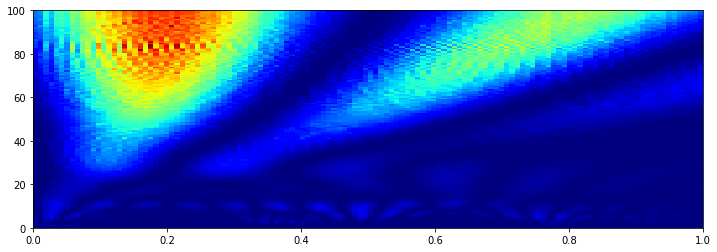

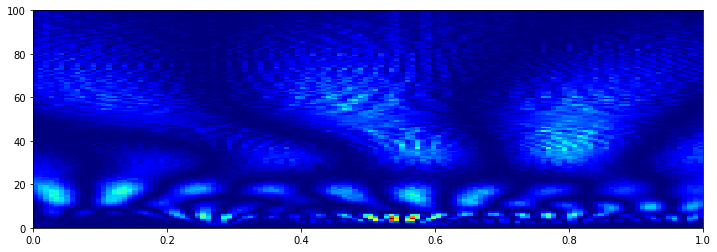

In [41]:
wavelet = 'morl'
scales = np.arange(1,128)
sampling_period = 1/2048

#This is probably wrong. I think it should take only train_data[0] but then it crashes
coeff,freqs=pywt.cwt(train_data[0][0], scales, wavelet, sampling_period) 
cwtPower=abs(coeff)**2
fig, ax=plt.subplots(figsize=(12, 4))
im=ax.imshow(cwtPower[::-1],aspect='auto',cmap="jet",extent=[0,1,0,100])